In [1]:
# from speechbrain.pretrained import SpeakerRecognition
# verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
# score, prediction = verification.verify_files("speechbrain/spkrec-ecapa-voxceleb/example1.wav", "speechbrain/spkrec-ecapa-voxceleb/example2.flac")
# score, prediction

In [2]:
# !pip install diart

In [3]:
import os
BASE = os.getcwd()
DEMO_FILE = {'uri': 'ES2004a.Mix-Headset', 
             'audio': 'ES2004a.Mix-Headset.wav', 
             'rttm': 'ES2004a.Mix-Headset.rttm' 
            }
# AUDIO_FILE_BASE = "ES2004a.Mix-Headset.wav"
# AUDIO_RTTM_BASE = "ES2004a.Mix-Headset.rttm" 

AUDIO_FILE = os.path.join(BASE, DEMO_FILE['audio'])
RTTM_FILE = os.path.join(BASE, DEMO_FILE['rttm'])



In [4]:
# runs SSD and generates the rttm file
!python -m diart.stream {AUDIO_FILE}


Streaming ES2004a.Mix-Headset:   4%|▍         | 85/2090 [00:31<12:01,  2.78it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:   8%|▋        | 170/2090 [01:02<12:31,  2.55it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  12%|█        | 255/2090 [01:35<11:22,  2.69it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  16%|█▍       | 340/2090 [02:07<10:51,  2.69it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  20%|█▊       | 425/2090 [02:38<10:02,  2.76it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  24%|██▏      | 510/2090 [03:10<09:31,  2.76it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  28%|██▌      | 595/2090 [03:42<09:16,  2.69it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  33%|██▉      | 680/2090 [04:14<08:26,  2.78it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  37%|███▎     | 765/2090 [04:46<08:12,  2.69it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  41%|███▋     | 850/2090 [05:18<07:52,  2.63it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  45%|████     | 935/2090 [05:50<07:39,  2.51it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  49%|███▉    | 1020/2090 [06:23<07:09,  2.49it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  53%|████▏   | 1105/2090 [06:55<06:14,  2.63it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  57%|████▌   | 1190/2090 [07:28<05:34,  2.69it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  61%|████▉   | 1275/2090 [08:00<04:53,  2.77it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  65%|█████▏  | 1360/2090 [08:33<04:29,  2.71it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  69%|█████▌  | 1445/2090 [09:05<03:37,  2.97it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  73%|█████▊  | 1530/2090 [09:37<03:25,  2.73it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  77%|██████▏ | 1615/2090 [10:09<02:59,  2.64it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  81%|██████▌ | 1700/2090 [10:42<02:20,  2.77it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  85%|██████▊ | 1785/2090 [11:15<01:58,  2.57it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  89%|███████▏| 1870/2090 [11:47<01:20,  2.73it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  94%|███████▍| 1955/2090 [12:19<00:50,  2.67it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset:  98%|███████▊| 2040/2090 [12:51<00:18,  2.76it/s]Figure(640x480)


Streaming ES2004a.Mix-Headset: 100%|████████| 2090/2090 [13:11<00:00,  2.64it/s]


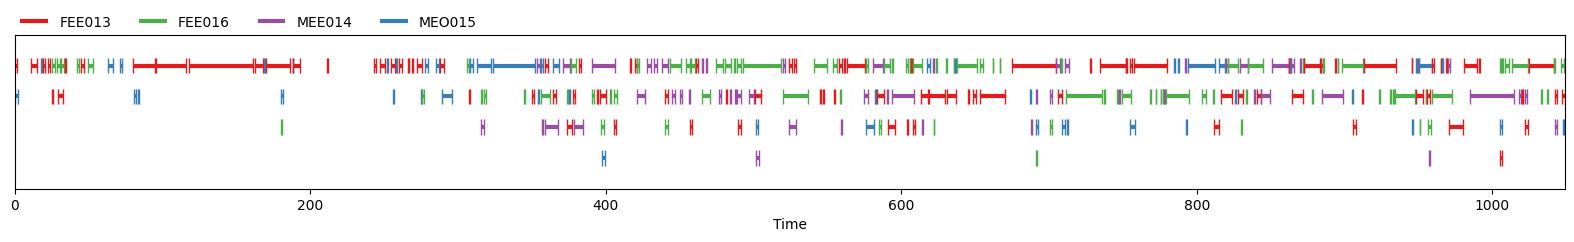

In [5]:
# load groundtruth
from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate


groundtruth = load_rttm('MixHeadset.test.rttm') # this is a dict for Mix-Headset db
groundtruth = groundtruth[DEMO_FILE['uri']] # get groundtruth of DEMO

# visualize groundtruth
groundtruth
# This nice visualization is by pyannote.core and basically indicates when each speaker speaks.
# SPEAKER {file_name} 1 {start_time} {duration} <NA> <NA> {speaker_name} <NA> <NA>

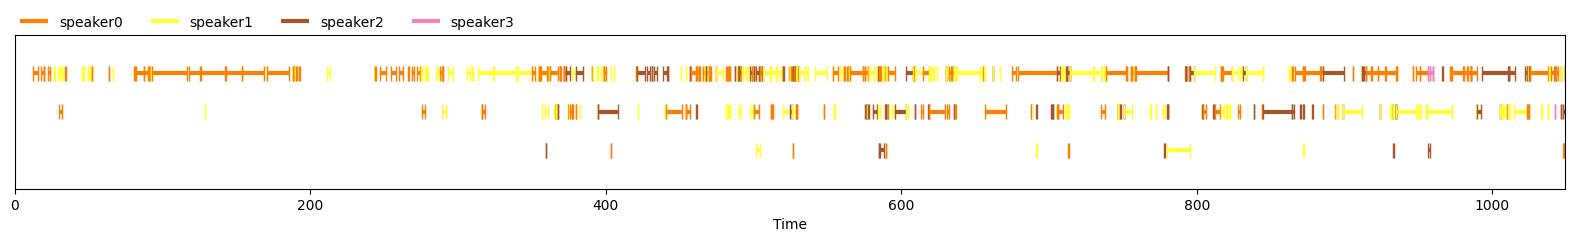

In [6]:
# load hypothesis

hypothesis = load_rttm(DEMO_FILE['rttm']) # this is generated above by diart
hypothesis = hypothesis[DEMO_FILE['uri']] # get groundtruth of DEMO

# visualize groundtruth
hypothesis



In [7]:
# get DER by comparing groundtruth and hypothesis generated by model
metric2 = DiarizationErrorRate()
der2 = metric2(groundtruth, hypothesis)
print(f'diarization error rate 2 = {100 * der2:.1f}%')

/usr/local/lib/python3.8/dist-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


diarization error rate 2 = 38.5%
